In [1]:
import torch
from fastai.vision import *

In [2]:
tfms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [3]:
np.random.seed(42)
src = (ImageList
        .from_csv('../input/', 'labels.csv', delimiter=';', folder='lfw.list.out', suffix='.png')
        .split_by_rand_pct(0.2)
        .label_from_df(label_delim=' '))

In [4]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

In [15]:
data.c

129

In [5]:
arch = models.resnet50

In [6]:
acc_02 = partial(accuracy_thresh, thresh=0.5)
f_score = partial(fbeta, thresh=0.5)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/onepanel/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 122977101.83it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


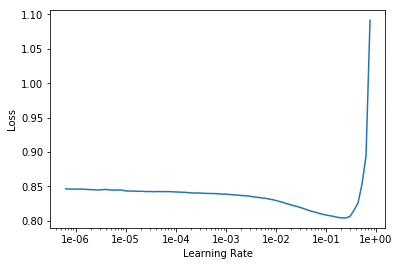

In [7]:
learn.lr_find()
learn.recorder.plot()

In [8]:
lr = 0.05

In [9]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.683068,0.700268,0.533498,0.546284,03:24
1,0.691779,2.296199,0.520558,0.524509,03:19
2,0.677693,0.756681,0.535448,0.531619,03:17
3,0.668449,0.771129,0.540782,0.551525,03:19
4,0.659696,0.813962,0.549482,0.540297,03:17


In [10]:
learn.save('stage-1-rn50-full')

In [19]:
learn.load('stage-1-rn50-full')

Learner(data=ImageDataBunch;

Train: LabelList (31760 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
0;3;4;5;6;7;15;16;17;20;21;23;24;25;29;30;35;39;46;48;51;52;54;56;58;61;62;63;64;66;70;71;72;77;78;79;86;87;90;95;96;100;103;105;106;107;108;109;110;111;112;113;115;116;119;120;121;124;127;,0;3;4;5;6;7;15;16;17;20;21;23;24;25;29;30;35;39;46;48;51;52;54;56;58;61;62;63;64;66;70;71;72;77;78;79;86;87;90;95;96;100;103;105;106;107;108;109;110;111;112;113;115;116;119;120;121;124;127;,0;3;4;5;6;7;15;16;17;20;21;23;24;25;29;30;35;39;46;48;51;52;54;56;58;61;62;63;64;66;70;71;72;77;78;79;86;87;90;95;96;100;103;105;106;107;108;109;110;111;112;113;115;116;119;120;121;124;127;,0;3;4;5;6;7;15;16;17;20;21;23;24;25;29;30;35;39;46;48;51;52;54;56;58;61;62;63;64;66;70;71;72;77;78;79;86;87;90;95;96;100;103;105;106;107;108;109;110;111;112;113;115;116;119;120;121;124;127;,2;3;4;5;8;10;11;13;14;15;16;18;24;28;32;34;35

In [17]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


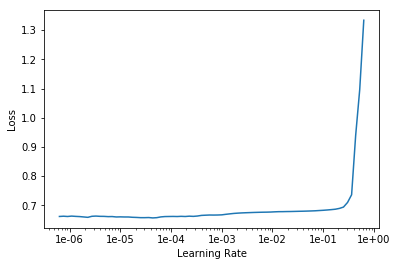

In [18]:
learn.lr_find()
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(10, slice(1e-3, 1e-1))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.687921,1910.601929,0.510496,0.487789,04:20
1,0.714623,2852.550781,0.513720,0.483223,04:21
2,0.732046,9.317713,0.502729,0.550585,04:18
3,0.721517,43.000351,0.510224,0.485784,04:18
4,0.737015,15742.724609,0.509160,0.488772,04:16
5,0.711417,244565.281250,0.513322,0.533858,04:16
6,0.699845,0.691138,0.518182,0.545626,04:16
7,0.692229,0.688702,0.522726,0.501301,04:16
8,0.687883,0.686933,0.522699,0.507542,04:16
9,0.686465,0.686302,0.526132,0.479845,04:17


In [21]:
learn.save('stage-2-rn50-full')

In [33]:
learn.unfreeze()

In [34]:
learn.fit_one_cycle(8, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.616430,3.695228,0.553424,0.810407,00:15
1,0.630777,643.144897,0.549352,0.773123,00:15
2,0.630605,9.349798,0.571607,0.817772,00:15
3,0.622449,0.798929,0.565034,0.797846,00:15
4,0.606588,2.349970,0.594131,0.854588,00:15
5,0.592542,0.962049,0.590594,0.841731,00:15
6,0.577027,0.544122,0.599078,0.863626,00:15
7,0.561423,0.541461,0.599757,0.864056,00:15


In [35]:
learn.save('stage-2-rn50')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


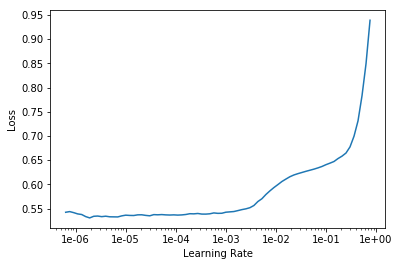

In [36]:
learn.lr_find()
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(5, slice(1e-5, lr/8))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.534012,0.622980,0.592809,0.859184,00:15
1,0.554587,44.334713,0.559890,0.824478,00:15
2,0.557113,0.549233,0.602115,0.861035,00:15
3,0.544821,0.527115,0.606009,0.866521,00:15
4,0.534036,0.522120,0.608295,0.867783,00:15


In [38]:
learn.save('stage-3-rn50')

/home/onepanel/.conda/lib/python3.6/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


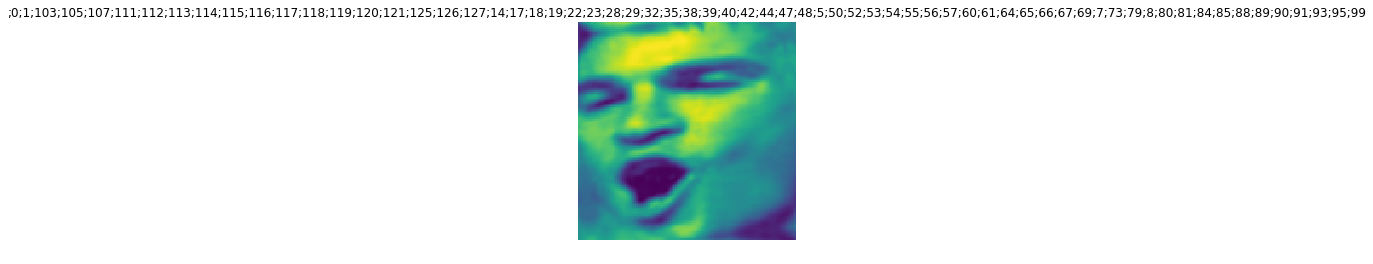

In [41]:
data.show_batch(rows=1)

In [42]:
counter = 0;

for x,y in data:
    pred = learn.predict(x)
    print(pred)
    
    if counter > 1 :
        break;
        
    counter = counter + 1

TypeError: 'ImageDataBunch' object is not iterable

In [43]:
data.label_list

LabelLists;

Train: LabelList (1738 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
0;1;3;4;5;6;10;13;15;16;17;19;20;21;26;28;29;32;33;37;38;39;41;42;43;50;52;53;54;56;58;60;61;63;64;65;68;71;76;81;82;84;85;87;88;89;92;93;97;98;99;101;106;108;110;111;113;115;119;120;121;122;127;,0;1;3;4;5;6;10;13;15;16;17;19;20;21;26;28;29;32;33;37;38;39;41;42;43;50;52;53;54;56;58;60;61;63;64;65;68;71;76;81;82;84;85;87;88;89;92;93;97;98;99;101;106;108;110;111;113;115;119;120;121;122;127;,0;1;3;4;5;6;10;13;15;16;17;19;20;21;26;28;29;32;33;37;38;39;41;42;43;50;52;53;54;56;58;60;61;63;64;65;68;71;76;81;82;84;85;87;88;89;92;93;97;98;99;101;106;108;110;111;113;115;119;120;121;122;127;,0;1;3;4;5;6;10;13;15;16;17;19;20;21;26;28;29;32;33;37;38;39;41;42;43;50;52;53;54;56;58;60;61;63;64;65;68;71;76;81;82;84;85;87;88;89;92;93;97;98;99;101;106;108;110;111;113;115;119;120;121;122;127;,0;1;3;4;5;6;10;13;15;16;17;19;20;21;26;